# Задание 1

### Скачать датасет о качестве КРАСНОГО вина по ссылке.

In [1]:
###https://archive.ics.uci.edu/ml/datasets/wine+quality

In [2]:
import pandas as pd
import requests,zipfile,io
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
r = requests.get('http://www3.dsi.uminho.pt/pcortez/wine/winequality.zip')
z = zipfile.ZipFile(io.BytesIO(r.content))

In [4]:
z.namelist()

['winequality/winequality-names.txt',
 'winequality/winequality-names.txt.bak',
 'winequality/winequality-red.csv',
 'winequality/winequality-white.csv']

In [5]:
df = pd.read_csv(z.open('winequality/winequality-red.csv'), sep = ';')
df.sample(n = 10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
28,7.1,0.710,0.00,1.90,0.080,14.0,35.0,0.99720,3.47,0.55,9.40,5
382,8.3,0.260,0.42,2.00,0.080,11.0,27.0,0.99740,3.21,0.80,9.40,6
234,8.2,1.000,0.09,2.30,0.065,7.0,37.0,0.99685,3.32,0.55,9.00,6
1584,6.7,0.320,0.44,2.40,0.061,24.0,34.0,0.99484,3.29,0.80,11.60,7
747,8.6,0.330,0.40,2.60,0.083,16.0,68.0,0.99782,3.30,0.48,9.40,5
1374,6.8,0.815,0.00,1.20,0.267,16.0,29.0,0.99471,3.32,0.51,9.80,3
690,7.4,1.185,0.00,4.25,0.097,5.0,14.0,0.99660,3.63,0.54,10.70,3
1009,9.6,0.500,0.36,2.80,0.116,26.0,55.0,0.99722,3.18,0.68,10.90,5
388,7.8,0.460,0.26,1.90,0.088,23.0,53.0,0.99810,3.43,0.74,9.20,6
1555,7.0,0.560,0.17,1.70,0.065,15.0,24.0,0.99514,3.44,0.68,10.55,7


# Задание 2

### На основе переменной quality с оценками вина создать новую переменную good: если quality > 5, то 1, иначе 0.

In [6]:
df ['good'] = df['quality'].apply(lambda x: 1 if x > 5 else 0)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [7]:
df.shape

(1599, 13)

# Задание 3, 4

### Исследовать, какие химические характеристики вина влияют на то, окажется оно хорошим или плохим, с применением не менее 5 диаграмм из урока. Отчет сделать в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

#### В начале посмотрим, какие вина были взяты для анализа по имеющимся данным.

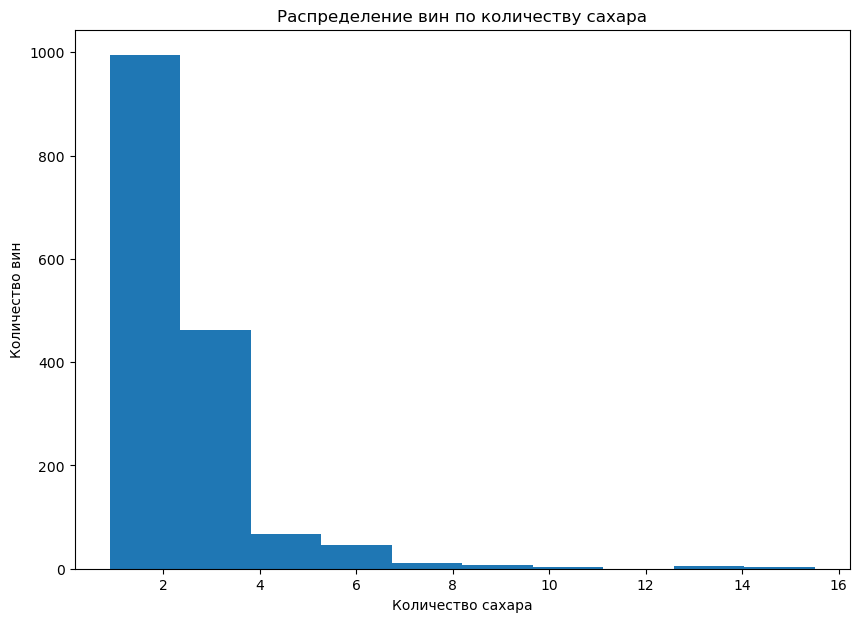

In [8]:
plt.figure(figsize = (10,7))

plt.hist(df['residual sugar'], bins = 10)

plt.title('Распределение вин по количеству сахара')
plt.xlabel('Количество сахара')
plt.ylabel('Количество вин')

plt.show()

#### На данном графике показано распределение значений исследуемых вин по количеству сахара. Мы видим, что в анализе преобладают сухие, полусухие и полусладкие вина.

In [9]:
data = df['good'].value_counts()
data.head()

1    855
0    744
Name: good, dtype: int64

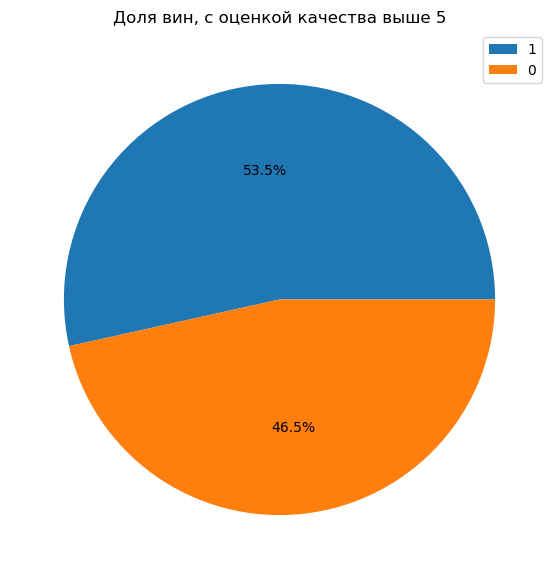

In [10]:
plt.figure(figsize = (10,7))

plt.pie(data, autopct='%1.1f%%')

plt.title('Доля вин, с оценкой качества выше 5')
plt.legend(data.index)

plt.show()

#### На данном графике видно, что в анализе преобладают вина, качество которых оценивается как хорошее (выше 5).

#### Далее оценим влияние некоторых факторов на качество вин.

In [11]:
data = df.groupby('quality')['citric acid'].agg(mean = 'mean').reset_index().sort_values(by = 'quality')
data.head()

,quality,mean
0,3,0.171000
1,4,0.174151
2,5,0.243686
3,6,0.273824
4,7,0.375176


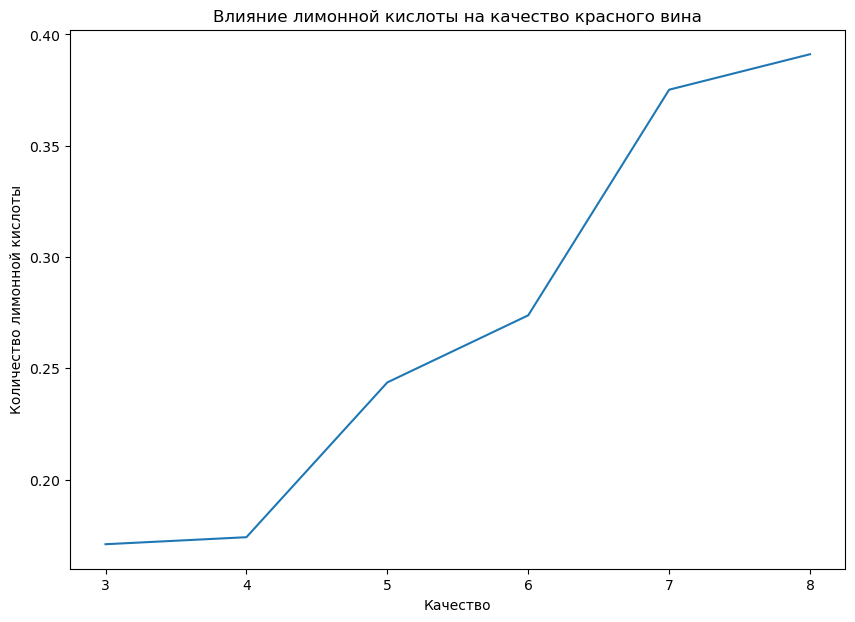

In [12]:
plt.figure(figsize = (10,7))

plt.plot(data['quality'], data['mean'])

plt.title('Влияние лимонной кислоты на качество красного вина')
plt.xlabel('Качество')
plt.ylabel('Количество лимонной кислоты')

plt.show()

#### Для построения данного графика было исплльзовано среднее значение признака (лимонной кислоты), сгрупированного  по столбцу "качество". 
#### Данный график показывает, что с увеличением количества лимонной кислоты средняя оценка вина увеличивается.

#### Построим график "ящик с усами" для вин, с оценкой качества больше и меньше 5.

In [13]:
data1 = df['alcohol'].loc[df['good']== 1]
data2 = df['alcohol'].loc[df['good']== 0]
data1.head()

3      9.8
7     10.0
8      9.5
16    10.5
19     9.2
Name: alcohol, dtype: float64

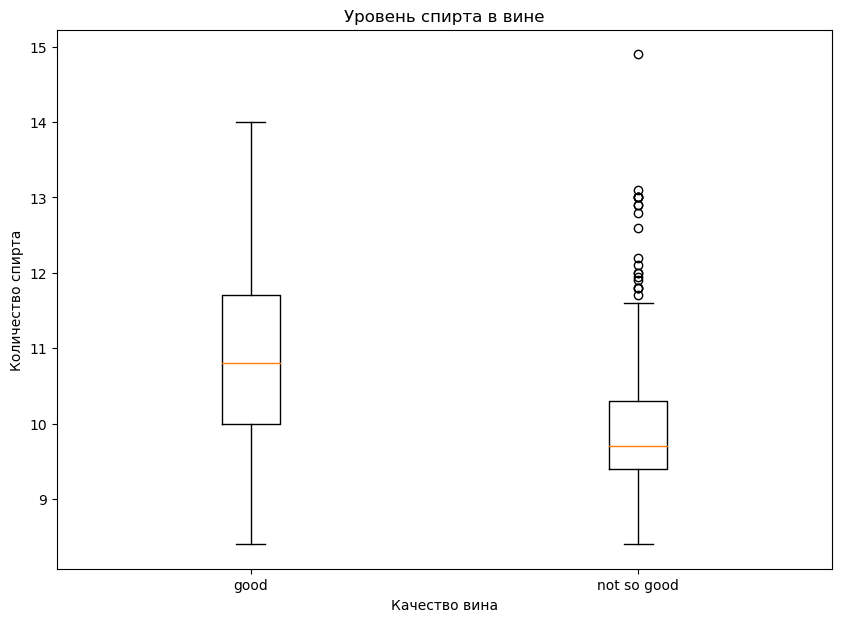

In [14]:
plt.figure(figsize = (10,7))

plt.boxplot([data1, data2])

plt.title('Уровень спирта в вине')
plt.xlabel('Качество вина')
plt.ylabel('Количество спирта')
plt.xticks([1, 2],['good', 'not so good'])

plt.show()

#### Боксплот показывает, что у хороших вин больший разброс значений количества спирта, у вин более низкого качества много выбросов, в то время как у хороших вин их нет. Также мы видим, что медианные и максимальные значения количества спирта в винах отличаются.

#### Далее проведем корреляционный анализ. Построим матрицу корреляций

In [15]:
correlation = df.corr()
correlation

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052,0.095093
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558,-0.321441
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373,0.159129
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732,-0.002160
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907,-0.109494
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656,-0.061757
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100,-0.231963
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919,-0.159110
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731,-0.003264
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397,0.218072


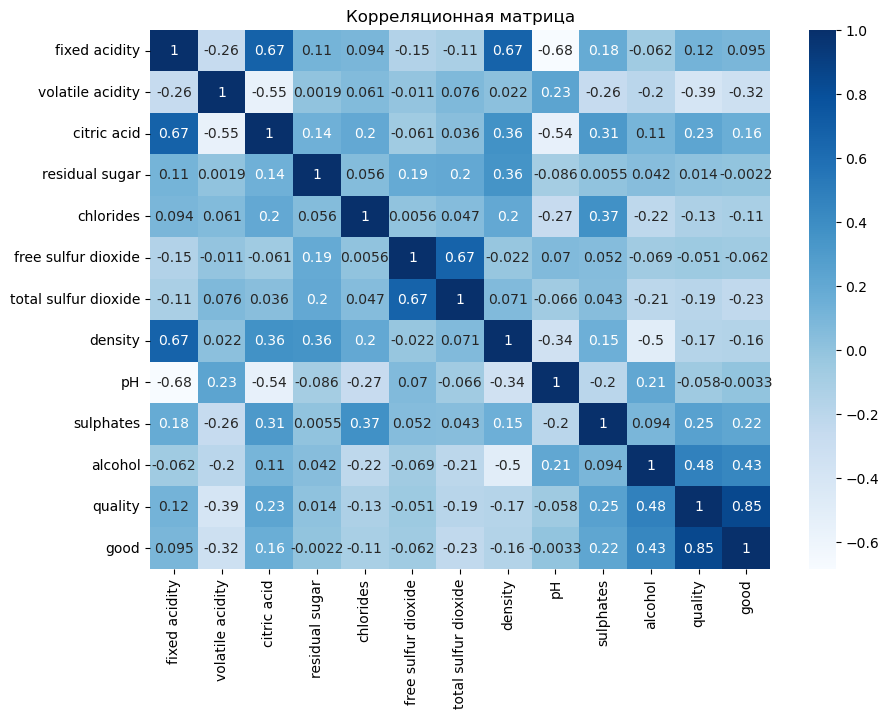

In [16]:
plt.figure(figsize = (10,7))
sns.heatmap(correlation, cmap = 'Blues', annot = True)
plt.title('Корреляционная матрица')
plt.show()

#### Матрица показывает как прямую, так и обратную корреляционную связи показателей, влияение их на качество вина. Мы видим,что некоторые признаки имеют достаточно высокий показатель корреляции. Например, количество лимонной кислоты и фиксированная кислотность. При этом при увеличении признака увеличивается и оценка качества вина.

#### Построим попарные отношения переменных

In [18]:
data = df[['fixed acidity','density','citric acid']]
data.head()

,fixed acidity,density,citric acid
0,7.4,0.9978,0.00
1,7.8,0.9968,0.00
2,7.8,0.9970,0.04
3,11.2,0.9980,0.56
4,7.4,0.9978,0.00


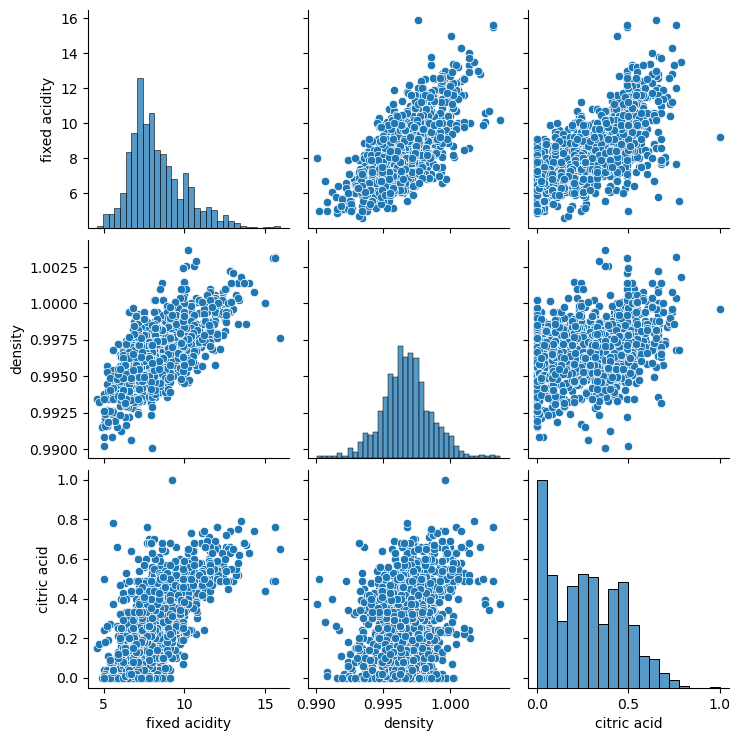

In [19]:
sns.pairplot(data)

#### Эти графики дают нам представление о взаимосвязи между каждой парой переменных в нашем наборе данных. Мы видим, что эти показатели имеют положительную кореляцию, при этом корреляция фиксированной кислотность и плотности более сильная.